# SALES PREDICTION

**Import the Necessary Packages**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
sales_data=pd.read_csv('Advertising.csv')

In [5]:
sales_data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


**Checking for Null and Duplicates Values**

In [7]:
sales_data.duplicated().sum()

0

There are no duplicates in the given dataset

In [8]:
sales_data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

The First Attribute **Unnamed: 0** is unnecessary.So, it can be dropped

In [9]:
sales_data.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [10]:
sales_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [11]:
col=list(sales_data.columns)

Finding the Columns with value '0'

In [12]:
(sales_data==0).sum()

TV           0
Radio        1
Newspaper    0
Sales        0
dtype: int64

In [13]:
sales_data[sales_data['Radio']==0]

,TV,Radio,Newspaper,Sales
127,80.2,0.0,9.2,8.8


In [14]:
sales_data.shape

(200, 4)

**Finding the Correlation between Attributes**

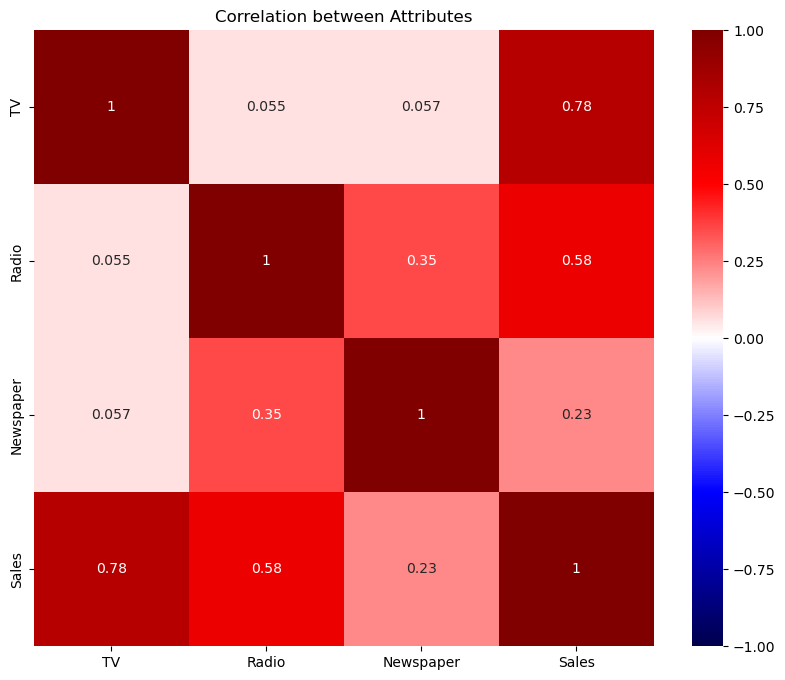

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(data=sales_data.corr(),annot=True,vmin=-1,cmap='seismic')
plt.title('Correlation between Attributes')
plt.show()

In [16]:
sales_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# DATA VISUALIZATION

<Axes: xlabel='Newspaper', ylabel='Sales'>

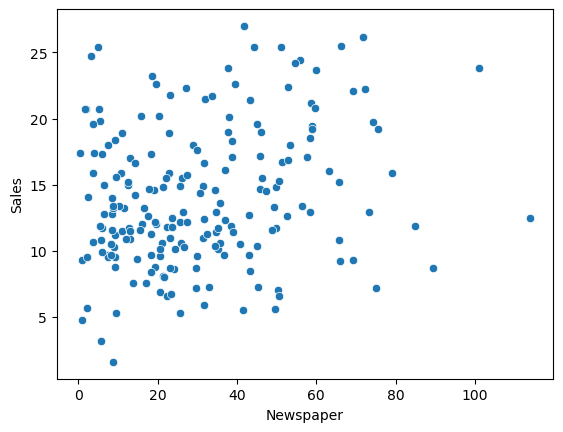

In [17]:
sns.scatterplot(data=sales_data,x='Newspaper',y='Sales',palette='Set2')

<Axes: xlabel='Radio', ylabel='Newspaper'>

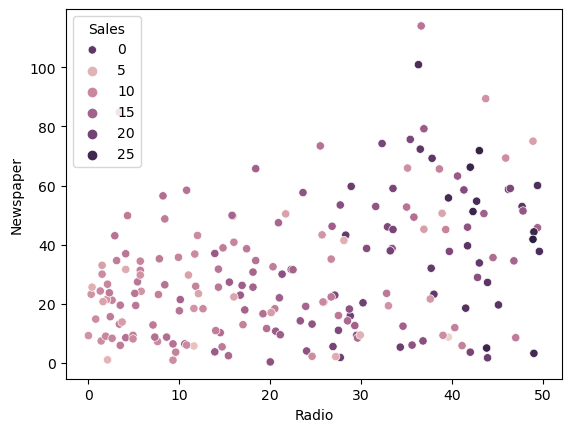

In [18]:
sns.scatterplot(data=sales_data,x='Radio',y='Newspaper',hue='Sales',label=0)

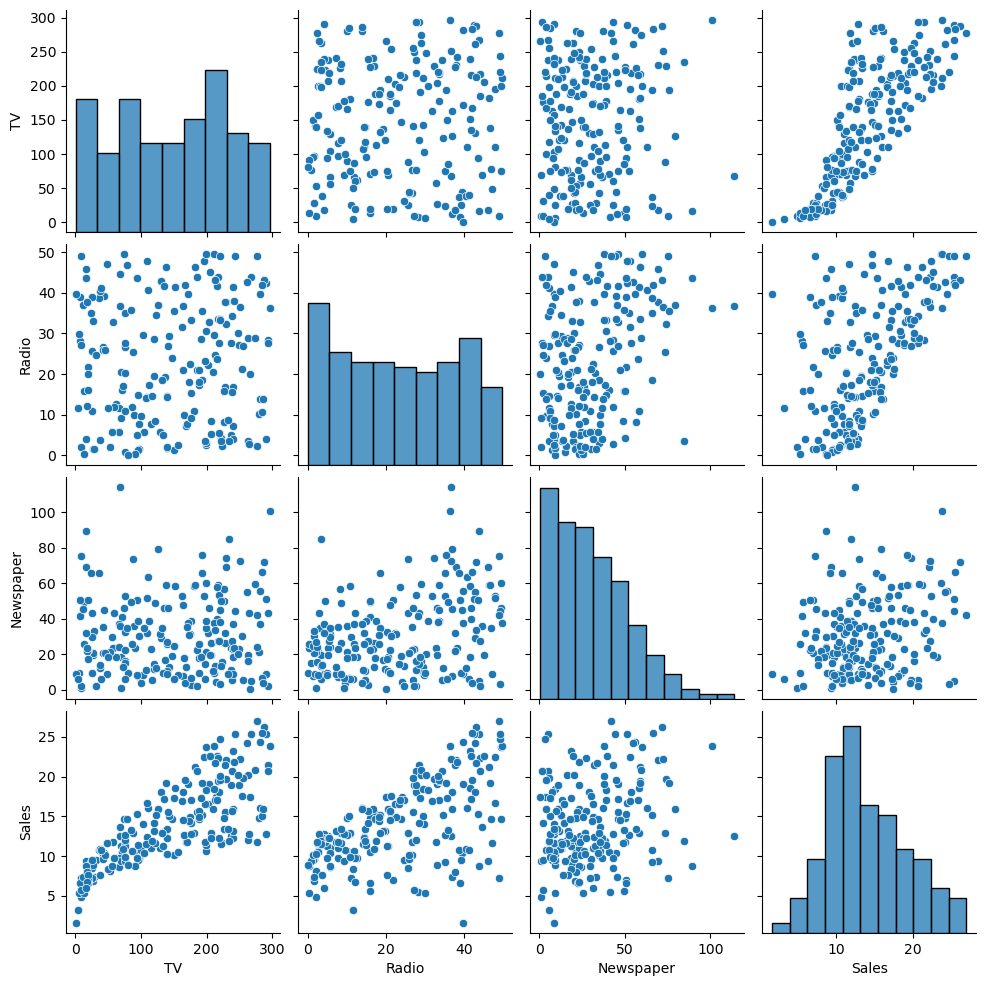

In [19]:
sns.pairplot(data=sales_data)

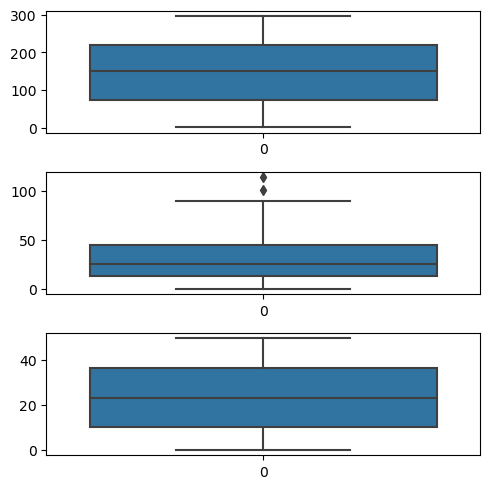

In [20]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(sales_data['TV'], ax = axs[0])
plt2 = sns.boxplot(sales_data['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(sales_data['Radio'], ax = axs[2])
plt.tight_layout()

### Feature Selection

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X=sales_data.drop(columns=['Sales'])
y=sales_data['Sales']

In [27]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [28]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=28)

# MODEL TRAINING

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
linear_model=LinearRegression()

In [32]:
linear_model.fit(X_train,y_train)

LinearRegression()

In [34]:
linear_prediction=linear_model.predict(X_test)

In [35]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [36]:
mean_abs_error=mean_absolute_error(y_test,linear_prediction)
print("Mean Absolute Error: ",mean_abs_error)

Mean Absolute Error:  1.320771787348891


MAE is in the same units as the target variable. If target variable is Sales Price in dollars, then an MAE of 1.0973 dollars means that, on average, the predictions are off by about 1.3207 dollars

In [37]:
mean_sqr_error=mean_squared_error(y_test,linear_prediction)
print("Mean Squared Error: ",mean_sqr_error)

Mean Squared Error:  2.6274665528028667


MSE of 2.627 indicates the average squared error between model’s predictions and the actual values.

#### PREDICTING THE CAR PRICE FOR USER DEFINED VALUES

In [39]:
def predict_selling_price(model, input_data):
    input_df = pd.DataFrame([input_data])
    input_df = pd.get_dummies(input_df, drop_first=True).reindex(columns=X.columns, fill_value=0)
    prediction = model.predict(input_df)
    return prediction[0]

user_input = {
    'TV': float(input("Enter the Price of TV: ")),
    'Radio': float(input("Enter the Price of Radio: ")),
    'Newspaper': float(input("Enter the Price of Newspaper: "))
}
predicted_price = predict_selling_price(linear_model, user_input)
print(f"Predicted Seales Price: {predicted_price}")

Enter the Price of TV: 126.8
Enter the Price of Radio: 29.7
Enter the Price of Newspaper: 78.9
Predicted Seales Price: 14.348429304564826


### DONE BY

MOHAMED SAMIR M